# **Salifort Motors Analysis**

### Business Scenario and Problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. Based on this data, they have the following question: what’s likely to make an employee leave the company?

The goals for this project are as follows:
- Create a model to predict whether or not an employee will leave the company
- Determine the key factors that correlate with employee retention
- Make recommendations to retain more employees moving forward

### Data

The dataset that we'll be using contains 15,000 rows and 10 columns for the variables listed below. 

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

# Stage One: Plan
- Familiarize with the data
- Gather basic information
- Create a project roadmap

## Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import base packages
import pandas as pd
import numpy as np
import pickle
import os

#import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Import modeling packages
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
from xgboost import plot_importance

# Import model classifiers
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


### Load dataset

In [ ]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Data Exploration (Initial EDA and data cleaning)

- Gather basic information about the data
- Clean the dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Basic Info
- 8 numerical columns
- 2 categorical columns
- 0 null values.

### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns = {'satisfaction_level':'satisfaction',
                           'number_project':'project',
                           'average_montly_hours':'average_hours',
                           'time_spend_company':'years_worked',
                           'Work_accident':'accident',
                           'promotion_last_5years':'promotion',
                           'Department':'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction', 'last_evaluation', 'project', 'average_hours',
       'years_worked', 'accident', 'left', 'promotion', 'department',
       'salary'],
      dtype='object')

### Check duplicates

Check for any duplicate entries in the data.

In [7]:
# Check for duplicates
df0.duplicated().sum()

np.int64(3008)

In [8]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction,last_evaluation,project,average_hours,years_worked,accident,left,promotion,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [9]:
# Drop duplicates and save resulting dataframe in a new variable
df1 = df0.drop_duplicates().reset_index(drop = True)

# Display information on the new dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   satisfaction     11991 non-null  float64
 1   last_evaluation  11991 non-null  float64
 2   project          11991 non-null  int64  
 3   average_hours    11991 non-null  int64  
 4   years_worked     11991 non-null  int64  
 5   accident         11991 non-null  int64  
 6   left             11991 non-null  int64  
 7   promotion        11991 non-null  int64  
 8   department       11991 non-null  object 
 9   salary           11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


### Check outliers

Check for outliers in the data.

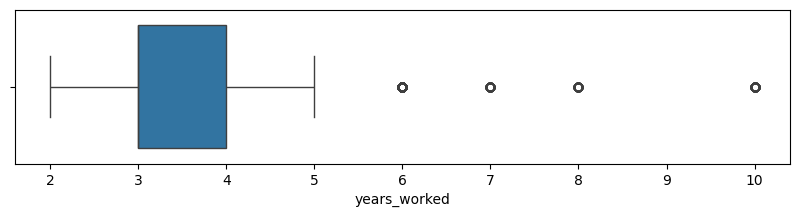

In [10]:
# Create a boxplot to visualize distribution of years worked and detect any outliers
plt.figure(figsize = (10, 2))
sns.boxplot(x = df1['years_worked']);


In [11]:
# Determine the number of rows containing outliers
(df1['years_worked'] > 5).sum()

np.int64(824)

**Note:** Certain types of models are more sensitive to outliers than others. When building our models, we will have to consider whether to remove outliers based on the model type.

# Stage Two: Analyze
- Create visualizations to better understand the data
- Prepare to build appropriate models


## Data Exploration (Continue EDA)

Determine how many employees left and what percentage of all employees this figure represents.

In [12]:
# Get numbers of people who left vs stayed
print('Number Stayed:', df1['left'].value_counts()[0])
print('Number Left:', df1['left'].value_counts()[1])

# Get percentages of people who left vs stayed
print('Percent Stayed:', round(df1['left'].value_counts(normalize = True)[0], 3))
print('Percent Left:', round(df1['left'].value_counts(normalize = True)[1], 3))

Number Stayed: 10000
Number Left: 1991
Percent Stayed: 0.834
Percent Left: 0.166


## Visualizations

Create plots to visualize relationships between variables in the data.

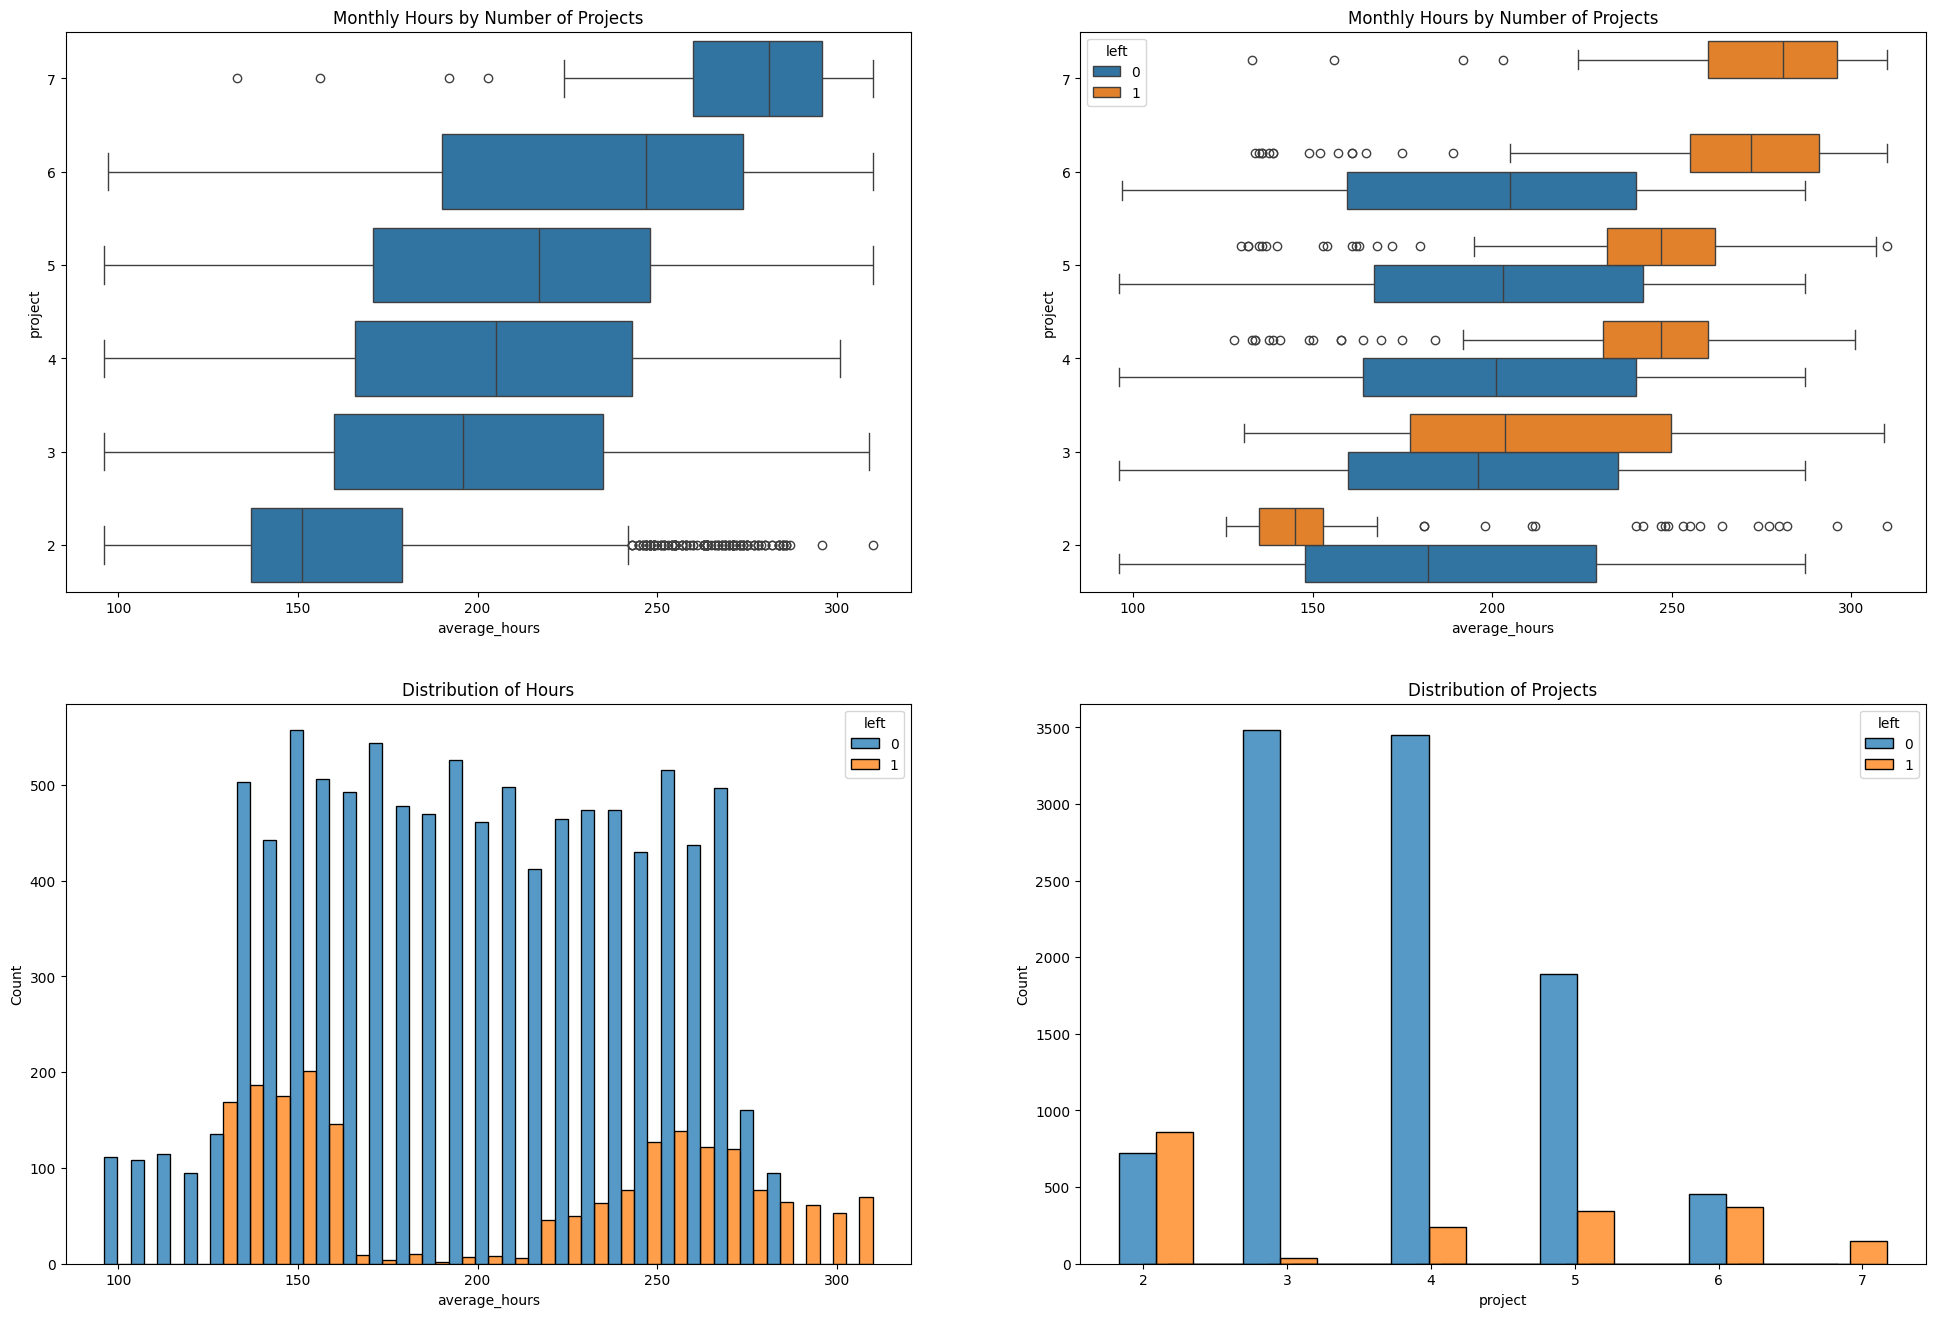

In [13]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize = (24, 16))

# Graph average monthly hours by number of projects
sns.boxplot(data = df1, y = 'project', x = 'average_hours', orient = 'horizontal', ax = axes[0, 0])
axes[0, 0].invert_yaxis()
axes[0, 0].set_title('Monthly Hours by Number of Projects')

# Graph average monthly hours by number of projects comparing who left vs who stayed
sns.boxplot(data = df1, y = 'project', x = 'average_hours', hue = 'left', orient = 'horizontal', ax = axes[0, 1])
axes[0, 1].invert_yaxis()
axes[0, 1].set_title('Monthly Hours by Number of Projects')

# Graph the distribution of average monthly hours comparing who left vs who stayed
sns.histplot(data = df1, x = 'average_hours', hue = 'left', multiple = 'dodge', ax = axes[1, 0])
axes[1, 0].set_title('Distribution of Hours');

# Graph the distribution of projects comparing who left vs who stayed
sns.histplot(data = df1, x = 'project', hue = 'left', multiple = 'dodge', shrink = 3,  ax = axes[1, 1])
axes[1, 1].set_title('Distribution of Projects');

**Insight:** It is quite clear in the first graph that as employees take on more projects, they tend to work longer hours.  The other charts suggest the existence of a "sweet-spot" around 200 hours per month and between three and four projects for maximum employee retention.

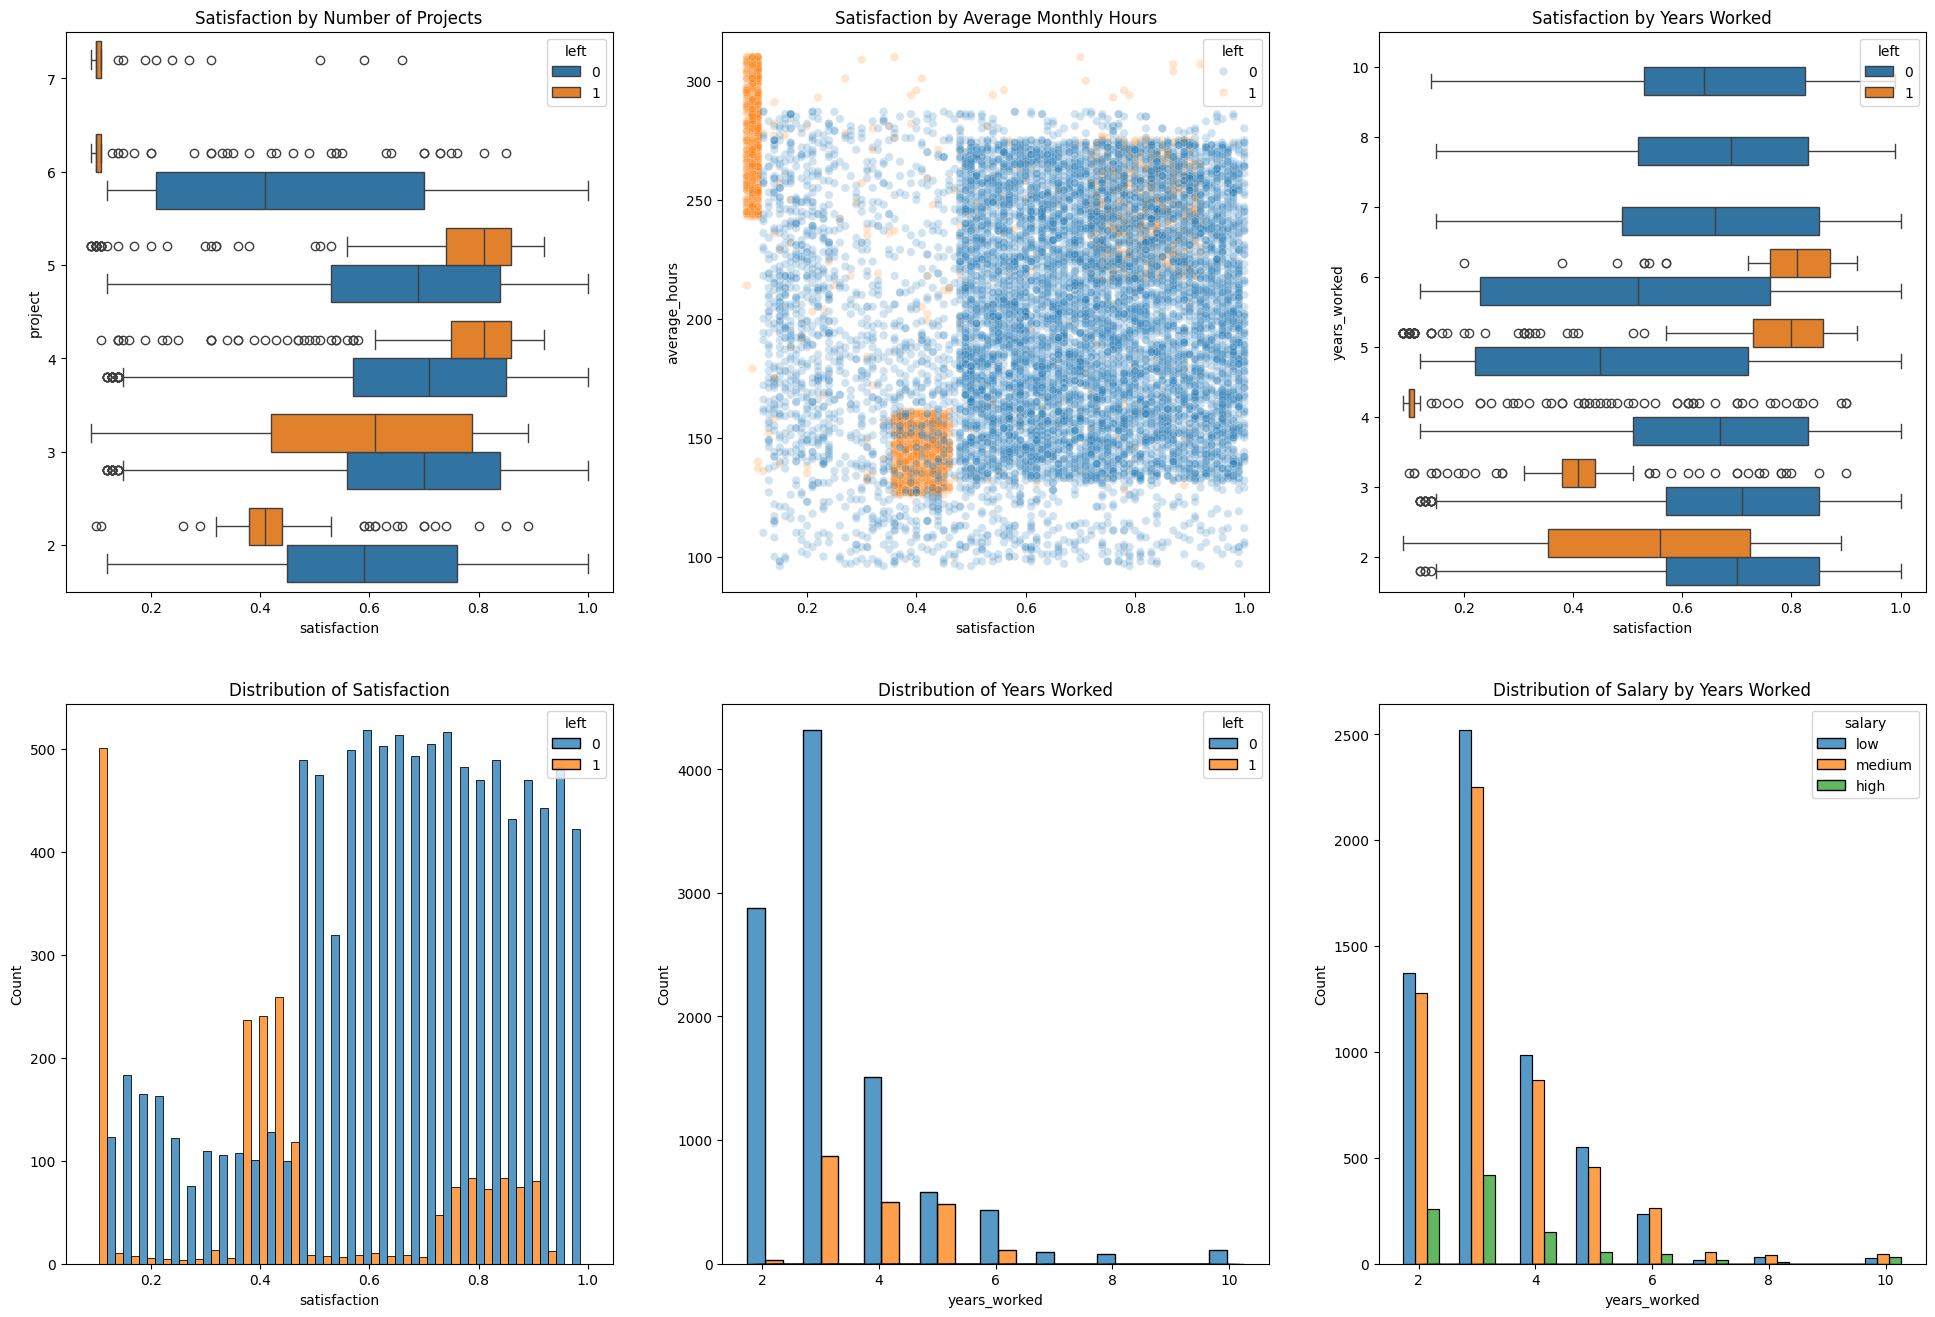

In [14]:
# Create a plot as needed
fig, axes = plt.subplots(2, 3, figsize = (24, 16))

# Graph satisfaction by number of projects comparing who left vs who stayed
sns.boxplot(data = df1, x = 'satisfaction', y = 'project', orient = 'horizontal', hue = 'left', ax = axes[0, 0])
axes[0, 0].invert_yaxis()
axes[0, 0].set_title('Satisfaction by Number of Projects')

# Graph satisfaction by average hours comparing who left vs who stayed
sns.scatterplot(data = df1, x = 'satisfaction', y = 'average_hours', hue = 'left', ax = axes[0, 1], alpha = 0.2)
axes[0, 1].set_title('Satisfaction by Average Monthly Hours')

# Graph satisfaction by years worked comparing who left vs who stayed
sns.boxplot(data = df1, x = 'satisfaction', y = 'years_worked', hue = 'left', orient = 'horizontal', ax = axes[0, 2])
axes[0, 2].invert_yaxis()
axes[0, 2].set_title('Satisfaction by Years Worked')

# Graph distribution of satisfaction comparing who left vs who stayed
sns.histplot(data = df1, x = 'satisfaction', multiple = 'dodge', hue = 'left', ax = axes[1, 0])
axes[1, 0].set_title('Distribution of Satisfaction')

# Graph distribution of years worked comparing who left vs who stayed
sns.histplot(data = df1, x = 'years_worked', multiple = 'dodge', shrink = 7, hue = 'left', ax = axes[1, 1])
axes[1, 1].set_title('Distribution of Years Worked')

# Graph distribution of years worked comparing salary ranges
sns.histplot(data = df1, x = 'years_worked', multiple = 'dodge', shrink = 7, hue = 'salary', ax = axes[1, 2])
axes[1, 2].set_title('Distribution of Salary by Years Worked');

**Insight:** The graphs above reinforce the previous charts showing the highest satisfaction scores for employees working on three to five projects.  Aside from that, the charts show the following correlations:
- Employees working on six or seven projects are much less satisfied and are very likely to leave
- Everyone who worked over around 280 hours per month left no matter how satisfied they were
- Everyone who left with satisfaction scores over 0.7 were working over 200 hours per month
- Some employees drastically lose satisfaction in their fourth year at this company
- None of the employees who have been at this company for seven or more years have decided to leave. 

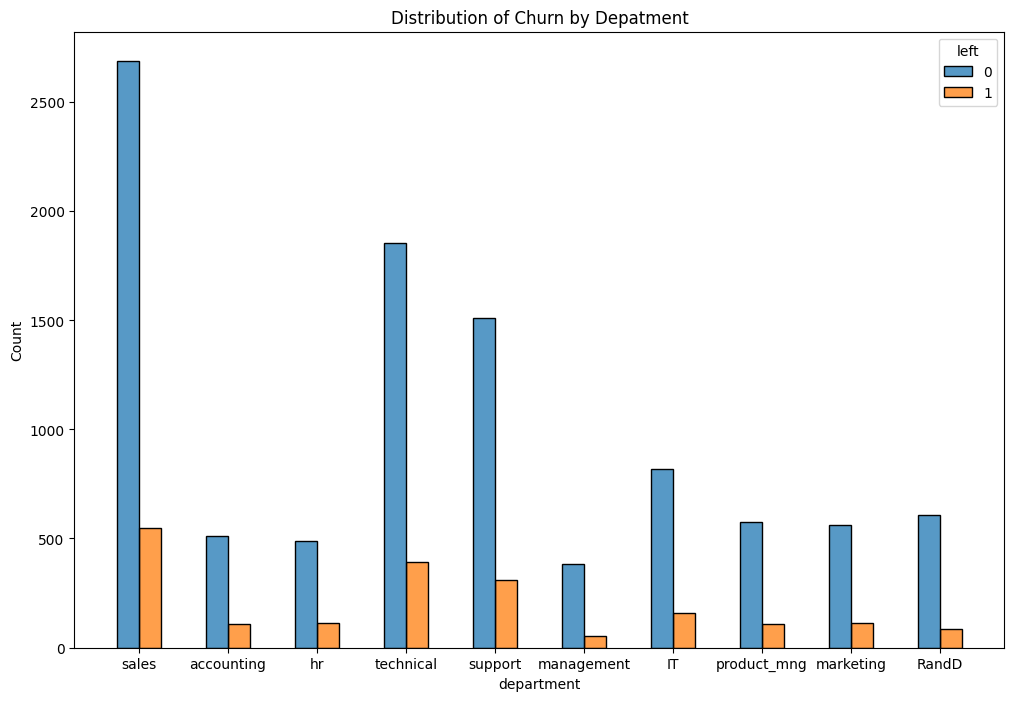

In [15]:
# Graph the distribution of departments comparing who left vs who stayed
plt.figure(figsize = (12, 8))
department = sns.histplot(data = df1, x = 'department', hue = 'left', multiple = 'dodge', shrink = 0.5)
department.set_title('Distribution of Churn by Depatment');

**Insight:**  The proportions of those who left versus those who stayed seems to be relatively consistant across all departments.  This would imply that the department an employee works in has little to no effect on their decision to stay or leave.

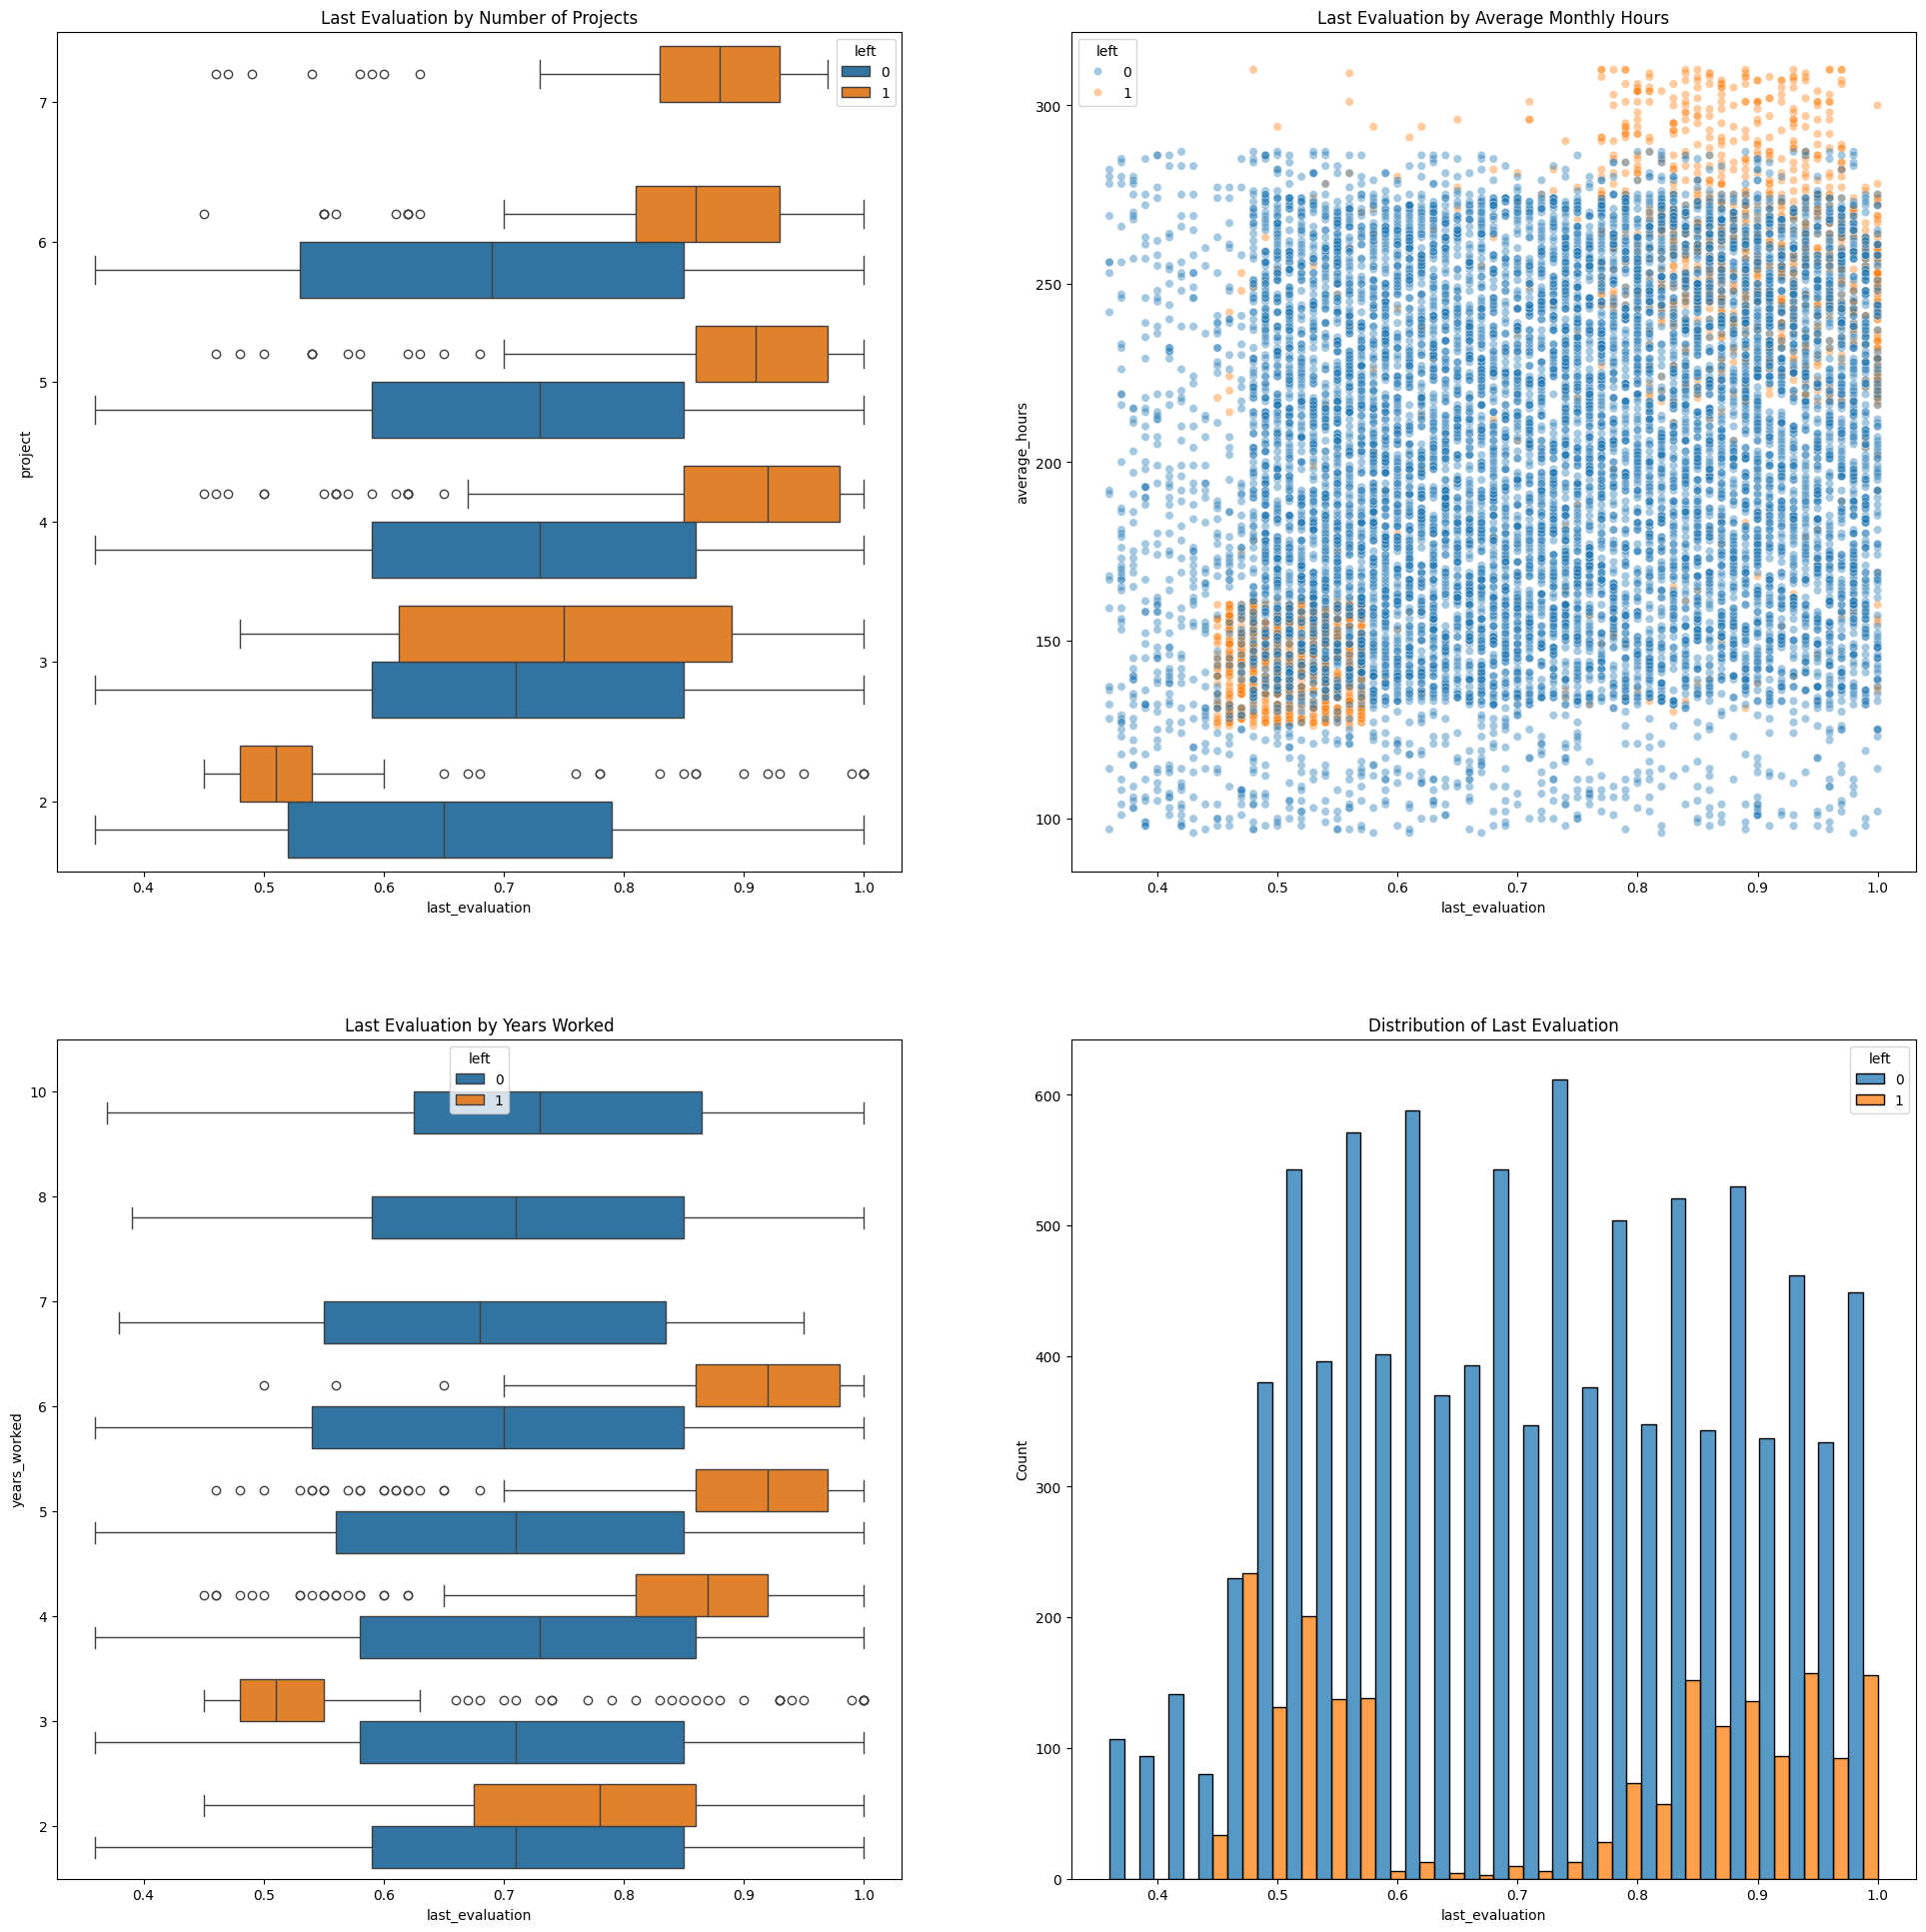

In [16]:
# Create a plot as needed
fig, axes = plt.subplots(2, 2, figsize = (24, 24))

# Graph last evaluation by number of projects comparing who left vs who stayed
sns.boxplot(data = df1, x = 'last_evaluation', y = 'project', orient = 'horizontal', hue = 'left', ax = axes[0, 0])
axes[0, 0].invert_yaxis()
axes[0, 0].set_title('Last Evaluation by Number of Projects')

# Graph last evaluation by average monthly hours comparing who left vs who stayed
sns.scatterplot(data = df1, x = 'last_evaluation', y = 'average_hours', hue = 'left', ax = axes[0, 1], alpha = 0.4)
axes[0, 1].set_title('Last Evaluation by Average Monthly Hours')

# Graph last evaluation by years worked comparing who left vs who stayed
sns.boxplot(data = df1, x = 'last_evaluation', y = 'years_worked', hue = 'left', orient = 'horizontal', ax = axes[1, 0])
axes[1, 0].invert_yaxis()
axes[1, 0].set_title('Last Evaluation by Years Worked')

# Graph distribution of last evaluation comparing who left vs who stayed
sns.histplot(data = df1, x = 'last_evaluation', multiple = 'dodge', hue = 'left', ax = axes[1, 1])
axes[1, 1].set_title('Distribution of Last Evaluation');

**Insight:** Just like previously, there seems to be a sweet-spot for employee evaluation around 0.7.  The vast majority of employees who left were either scored well above or well below this number.  Reasonably, this could mean that employees doing poorly were laid off, and employees who were doing well quit in search of a better job.

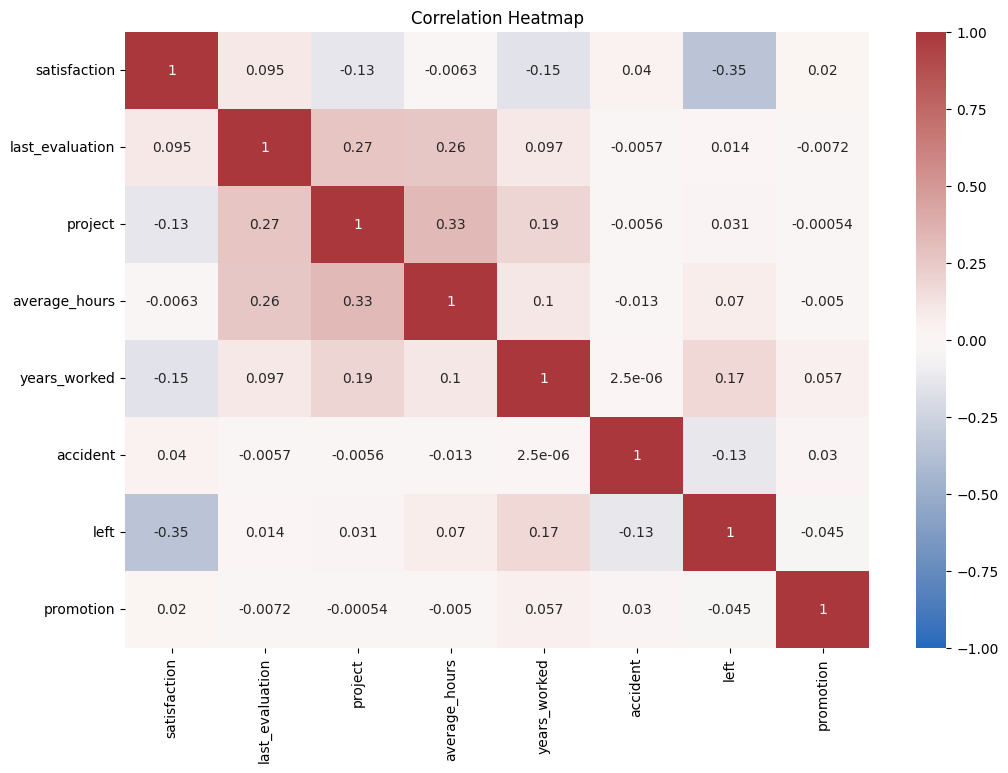

In [17]:
# Create a correlation heatmap
plt.figure(figsize = (12, 8))
heatmap = sns.heatmap(data = df1.corr(numeric_only = True), vmin = -1, vmax = 1, annot = True, cmap = sns.color_palette('vlag', as_cmap = True))
heatmap.set_title('Correlation Heatmap');

**Insight:** The graph above shows the strongest negative correlation between an employee's satisfaction and their decision to leave.  It also shows relatively high correlation between the number of projects worked on and the number of hours worked like we noticed in the first visual.  Aside from these two things, higher evaluation also tends to mean more projects and more hours.

# Stage Three: Construct
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results


## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Create and Evaluate Models
Since we are predicting whether an employee left or stayed, we will compare the following binary classification models:
 - Logistic Regression
 - Decision Tree
 - Random Forest

#### Logistic Regression:

First we must convert categorical data into numerical data.  Since salary is ordinal, we will encode it as such.

In [18]:
# Convert salary to ordinal and department to dummy
df2 = df1.copy()
encoder = OrdinalEncoder(categories = [['low', 'medium', 'high']])
df2['salary'] = encoder.fit_transform(df2[['salary']])
df2 = pd.get_dummies(data = df2, drop_first = True)

Next we must remove outliers to mitigate skew.

In [19]:
# Display descriptive statistics for logistic regression data
df_logreg = df2[['satisfaction', 'last_evaluation', 'project', 'average_hours', 'years_worked']]
outliers = df_logreg.describe()
outliers

,satisfaction,last_evaluation,project,average_hours,years_worked
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857
std,0.241070,0.168343,1.163238,48.727813,1.330240
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [20]:
# Find and remove outliers
up_lim = outliers.loc['75%'] + (outliers.loc['75%'] - outliers.loc['25%']) * 1.5 
low_lim = outliers.loc['25%'] - (outliers.loc['75%'] - outliers.loc['25%']) * 1.5
for col in df_logreg.columns:
    df_logreg = df_logreg[(low_lim[col] <= df_logreg[col]) & (df_logreg[col] <= up_lim[col])]
df_logreg = df_logreg.join(df2['left']).reset_index(drop = True)

Now we can create the logistic regression model.

In [21]:
# Create logistic regression model
Y = df_logreg['left']
X = df_logreg.drop(columns = 'left')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y, random_state = 0)

log = LogisticRegression(random_state = 0)

In [22]:
log.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [23]:
log_pred = log.predict(X_test)

In [24]:
# Create results function to display model performance
def test_results(model_name:str, test, pred):
    data = {'Model':model_name,
       'AUC':[metrics.roc_auc_score(test, pred)],
       'Accuracy':[metrics.accuracy_score(test, pred)],
       'Precision':[metrics.precision_score(test, pred, average = 'weighted')],
       'Recall':[metrics.recall_score(test, pred, average = 'weighted')],
       'F1':[metrics.f1_score(test, pred, average = 'weighted')]}
    results = pd.DataFrame(data = data)
    return results

In [25]:
log_results = test_results('log Reg', Y_test, log_pred)
log_results

,Model,AUC,Accuracy,Precision,Recall,F1
0,log Reg,0.586844,0.82235,0.788915,0.82235,0.798144


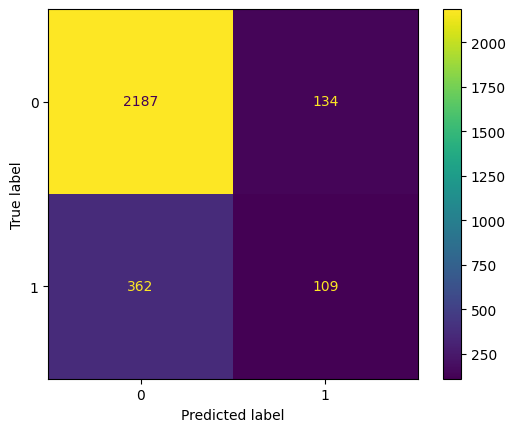

In [26]:
log_cm = metrics.confusion_matrix(Y_test, log_pred)
disp = metrics.ConfusionMatrixDisplay(log_cm, display_labels = log.classes_)
disp.plot(values_format = '');

#### Decision Tree Model:

In [27]:
# Create decision tree model
Y = df2['left']
X = df2.drop(columns = 'left')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y, random_state = 0)

tree = DecisionTreeClassifier(random_state = 0)

In [28]:
# Grid search to find optimal decision tree parameters
cv_params_tree = {'max_depth':[2, 4, 6, None],
            'min_samples_leaf':[2, 5, 1],
            'min_samples_split':[2, 4, 6]}
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
tree1 = GridSearchCV(tree, cv_params_tree, scoring = scoring, cv = 5, refit = 'roc_auc')

In [29]:
tree1.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 6, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [30]:
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [31]:
# Create results function to display model performance
def make_results(model_name:str, model_object, metric:str):
    metric_dict = {'auc':'mean_test_roc_auc',
                  'accuracy':'mean_test_accuracy',
                  'precision':'mean_test_precision',
                  'recall':'mean_test_recall',
                  'f1':'mean_test_f1'}
    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    AUC = best_estimator_results.mean_test_roc_auc
    Accuracy = best_estimator_results.mean_test_accuracy
    Precision = best_estimator_results.mean_test_precision
    Recall = best_estimator_results.mean_test_recall
    F1 = best_estimator_results.mean_test_f1
    
    table = pd.DataFrame({'Model':[model_name],
                         'AUC':[AUC],
                         'Accuracy':[Accuracy],
                         'Precision':[Precision],
                         'Recall':[Recall],
                         'F1':[F1]})
    return table

In [32]:
tree_train_results = make_results('Decision Tree', tree1, 'auc')
tree_train_results

,Model,AUC,Accuracy,Precision,Recall,F1
0,Decision Tree,0.971936,0.98143,0.972227,0.914269,0.942307


#### Random Forest Model

In [33]:
# rf = RandomForestClassifier(random_state = 0)
# cv_params_forest = {'max_depth':[3, 5, None],
#                    'max_features':[1.0],
#                    'max_samples':[0.7, 1.0],
#                    'min_samples_leaf':[1, 2, 3],
#                    'min_samples_split':[2, 3, 4],
#                    'n_estimators':[300, 500]}
# rf1 = GridSearchCV(rf, cv_params_forest, scoring = scoring, cv = 5, refit = 'roc_auc')

In [34]:
# rf1.fit(X_train, Y_train)

In [35]:
# Define a path to the folder where you want to save the model
path = 'C:\\Users\\becke\\OneDrive\\Desktop\\Portfolio\\Coursera Capstone 2'

In [36]:
# Create function to save models
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + '//' + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [37]:
# Create function to import saved models
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + '//' + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [38]:
# Write pickle
# write_pickle(path, rf1, 'rf')

In [39]:
# Read pickle
rf1 = read_pickle(path, 'rf')

In [40]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [41]:
rf_train_results = make_results('Random Forest', rf1, 'auc')
rf_train_results

,Model,AUC,Accuracy,Precision,Recall,F1
0,Random Forest,0.980212,0.976759,0.946647,0.911584,0.928735


In [42]:
train_results = pd.concat([tree_train_results, rf_train_results])
train_results

,Model,AUC,Accuracy,Precision,Recall,F1
0,Decision Tree,0.971936,0.981430,0.972227,0.914269,0.942307
0,Random Forest,0.980212,0.976759,0.946647,0.911584,0.928735


In [43]:
tree_pred = tree1.predict(X_test)
rf_pred = rf1.predict(X_test)

In [44]:
tree_results = test_results('Decision Tree', Y_test, tree_pred)  
tree_results

,Model,AUC,Accuracy,Precision,Recall,F1
0,Decision Tree,0.957239,0.982322,0.982216,0.982322,0.982123


In [45]:
rf_results = test_results('Random Forest', Y_test, rf_pred)
rf_results

,Model,AUC,Accuracy,Precision,Recall,F1
0,Random Forest,0.951419,0.97932,0.979148,0.97932,0.979078


In [46]:
# Display model results on test data
test_results = pd.concat([log_results, tree_results, rf_results])
test_results

,Model,AUC,Accuracy,Precision,Recall,F1
0,log Reg,0.586844,0.822350,0.788915,0.822350,0.798144
0,Decision Tree,0.957239,0.982322,0.982216,0.982322,0.982123
0,Random Forest,0.951419,0.979320,0.979148,0.979320,0.979078


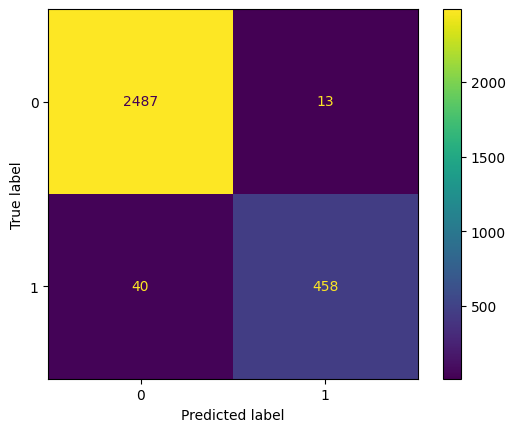

In [47]:
# Visualize decision tree test results
cm = metrics.confusion_matrix(Y_test, tree_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels = tree1.classes_)
disp.plot(values_format = '');

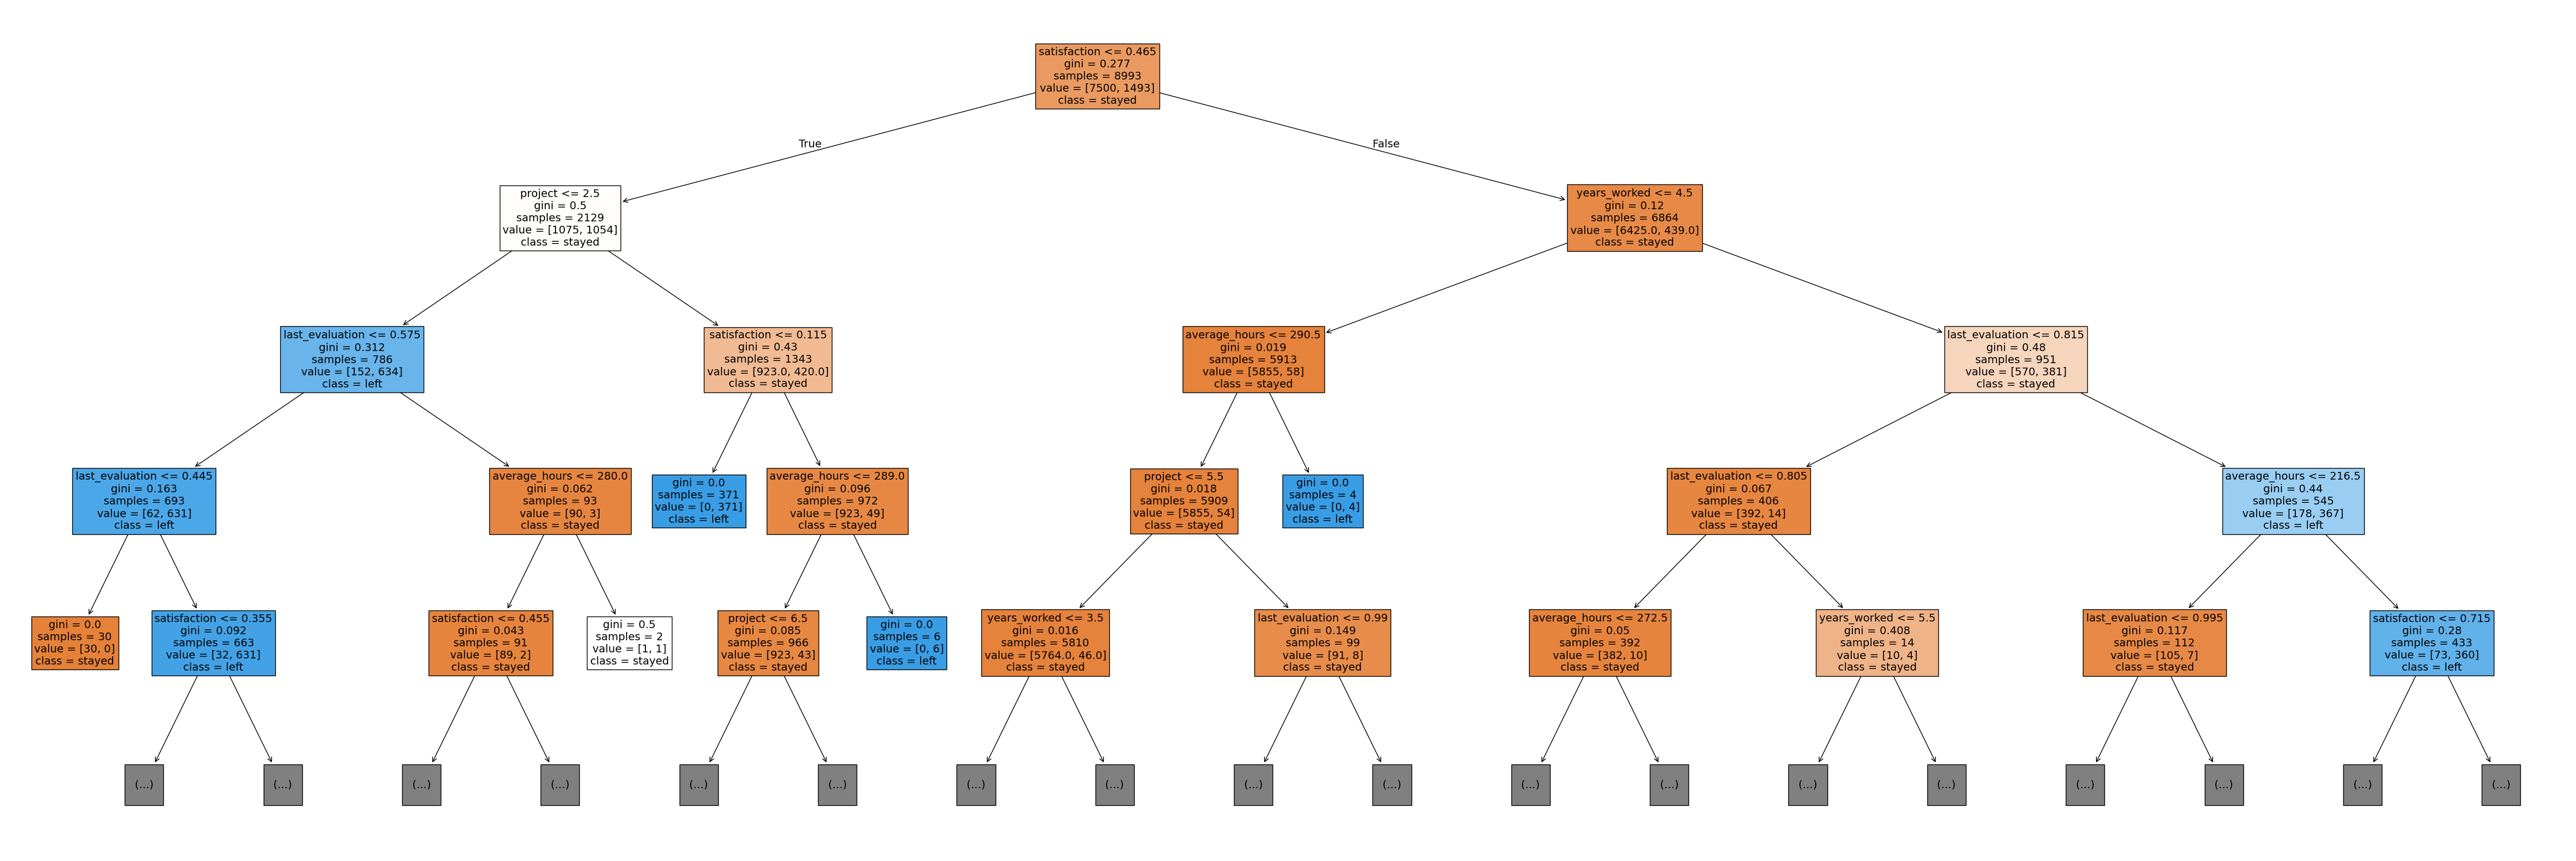

In [48]:
# Display decision tree model
plt.figure(figsize = (60, 20))
plot_tree(tree1.best_estimator_, max_depth = 4, feature_names = X.columns, fontsize = 14, class_names = {0:'stayed', 1:'left'}, filled = True)
plt.show()

In [49]:
tree_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, columns = ['Gini Importances'], index = X.columns).sort_values(by = "Gini Importances", ascending = False)
rf_importances = pd.DataFrame(rf1.best_estimator_.feature_importances_, columns = ['Gini Importances'], index = X.columns).sort_values(by = 'Gini Importances', ascending = False)

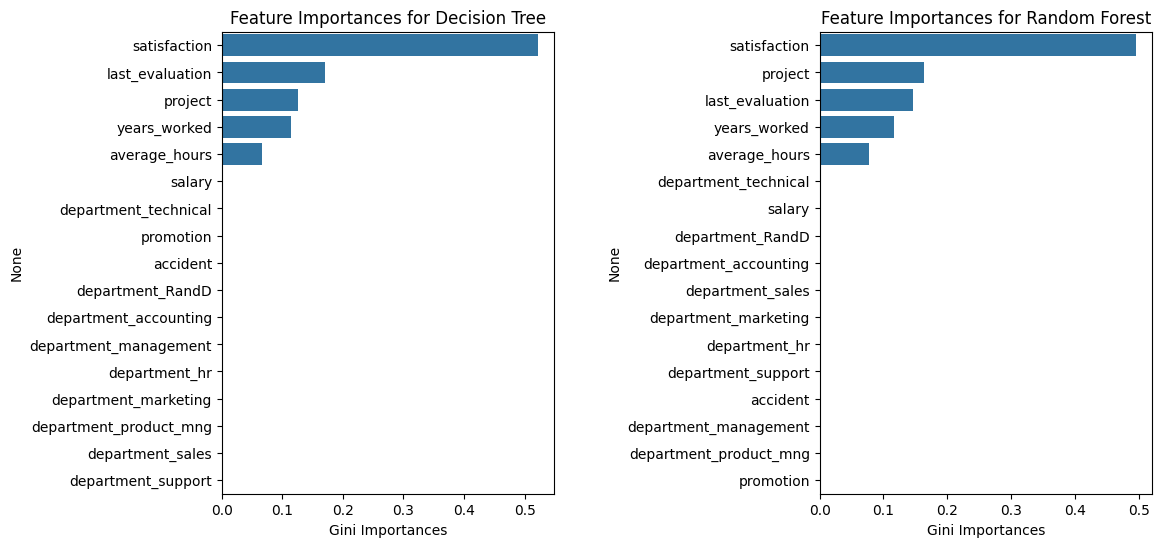

In [50]:
# Display key factors that correlate with employee retention
fig, axes = plt.subplots(1, 2, figsize = (12, 6))
plt.subplots_adjust(wspace = 0.8)
sns.barplot(data = tree_importances, x = 'Gini Importances', y = tree_importances.index, ax = axes[0]);
axes[0].set_title('Feature Importances for Decision Tree')
sns.barplot(data = rf_importances, x = 'Gini Importances', y = rf_importances.index, ax = axes[1])
axes[1].set_title('Feature Importances for Random Forest');

# Stage 4: Execute
- Interpret model performance and results
- Share actionable steps with stakeholders



## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

##### Linear Regression
The linear regression model performed the worst of the three models with most evaluation metrics hovering around 80% and the AUC below 60%.  These scores show that the linear regression model did a poor job of predicting true employee retention rates.

##### Decision Tree
The decision tree performed the best of the three models with scores around 98%.  This shows that the decision tree was able to correctly predict the actions of over 98% of employees who either left or stayed.

##### Random Forest
The random forest model performed only slightly worse than the decision tree model with scores only slightly below 98%.  Like the decision tree model, we were able to correctly predict the actions of about 98% of employees who either stayed or left.

### Conclusion, Recommendations, Next Steps

The models and feature importances shown above support the claim that employees are overworked.

The following recommendations could be presented to stakeholders:
- Consider capping the number of projects each employee can work on
- Create greater rewards for employees working longer hours, or don't require them to do so
- Make sure employees deeply understand company policy around extended hours

These are basic recommendations made from the data at hand.  It may be beneficial to collect more data on exactly **why** employees are satisfied rather than whether or not they are satisfied.  This data could possibly uncover a reason behind the large drop in satisfaction scores some four-year employees tend to have.